# Generate ROC curves for models

In [38]:

from sklearn.metrics import roc_curve
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import wandb
import matplotlib.pyplot as plt
import os

## Load test dataset

In [39]:
val_test_datagen = ImageDataGenerator(
    rescale=1/255  # rescale the tensor values to [0,1]
)

# loads test data
test_generator = val_test_datagen.flow_from_directory(
    directory=f"data/test",
    classes=['REAL', 'FAKE'],
    target_size=(128, 128),
    color_mode="rgb",
    class_mode=None,
    batch_size=1,
    shuffle=False
)

Found 1587 images belonging to 2 classes.


## Load models

In [41]:
wandb.restore('model-best.h5', run_path="dat550/deepfake-resnet/runs/2wxf3t3n")
os.rename('model-best.h5', 'model-best-resnet.h5')
resnet = load_model('model-best-resnet.h5')
resnet._name = 'Resnet'

wandb.restore('model-best.h5', run_path="dat550/deepfake-efficientnet/runs/29425ckm")
os.rename('model-best.h5', 'model-best-efficientnet.h5')
efficientnet = load_model('model-best-efficientnet.h5')
efficientnet._name = 'Efficient'

wandb.restore('model-best.h5', run_path="dat550/deepfake-basic/runs/3268den7")
os.rename('model-best.h5', 'model-best-basic.h5')
basic = load_model('model-best-basic.h5')
basic._name = 'Basic'

## Predict on model

In [42]:
# Predict all models and store in dict
predictions = {
    'Resnet': resnet.predict(test_generator).ravel(),
    'Efficient': efficientnet.predict(test_generator).ravel(),
    'Basic': basic.predict(test_generator).ravel()
}

In [43]:
# Get the true labels from test
y = test_generator.classes

## Generate ROC

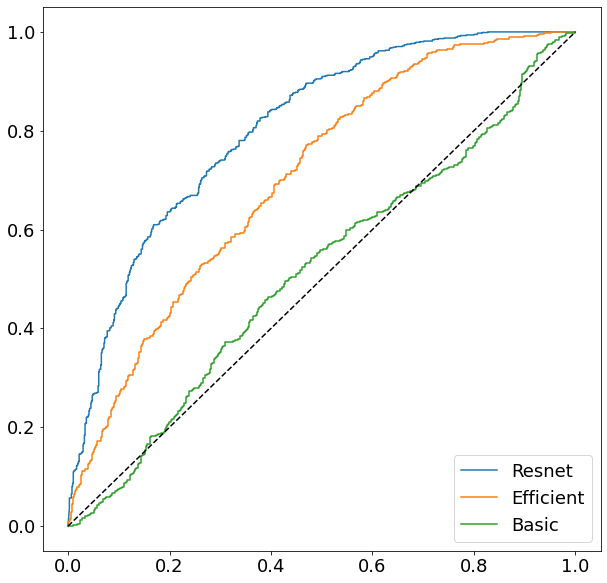

In [45]:
# Generate ROC curve and plot for all 
fig = plt.figure(figsize=(10, 10))
# Increase font size
plt.rcParams.update({'font.size': 18})
for model in predictions:
    fpr, tpr, thresholds = roc_curve(y, predictions[model])
    plt.plot(tpr, fpr, label=model)
    # Add legend
    plt.legend(loc='lower right')

# Add line from (0,0) to (1,1)
plt.plot([0, 1], [0, 1], 'k--')
plt.show()